# 저수지 수위 예측

In [2]:
!pip install pymysql

     |████████████████████████████████| 43 kB 1.8 MB/s 


In [3]:
import pymysql.cursors

# DB 연결
user="ssb"
password="dpa0506!"
host="db.dataponic.co.kr"
port=10060
database="dataponic_bigdata"

connection = pymysql.connect(host=host,port=port,
                             user=user,password=password,db=database,
                             charset='utf8',autocommit=True,
                             cursorclass = pymysql.cursors.DictCursor)

cursor = connection.cursor()
sql = "SELECT * FROM RSVR_WTRLV_ALL WHERE FAC_CODE = '4687010097'"
cursor.execute(sql)

result = cursor.fetchall()

connection.close()
print(result)

[{'CHECK_DATE': '20110101', 'COUNTY': '전라남도 영광군', 'FAC_CODE': '4687010097', 'FAC_NAME': '불갑', 'RATE': 76.4, 'WATER_LEVEL': 31.36}, {'CHECK_DATE': '20110102', 'COUNTY': '전라남도 영광군', 'FAC_CODE': '4687010097', 'FAC_NAME': '불갑', 'RATE': 76.4, 'WATER_LEVEL': 31.36}, {'CHECK_DATE': '20110103', 'COUNTY': '전라남도 영광군', 'FAC_CODE': '4687010097', 'FAC_NAME': '불갑', 'RATE': 73.2, 'WATER_LEVEL': 31.38}, {'CHECK_DATE': '20110104', 'COUNTY': '전라남도 영광군', 'FAC_CODE': '4687010097', 'FAC_NAME': '불갑', 'RATE': 75.0, 'WATER_LEVEL': 31.39}, {'CHECK_DATE': '20110105', 'COUNTY': '전라남도 영광군', 'FAC_CODE': '4687010097', 'FAC_NAME': '불갑', 'RATE': 77.0, 'WATER_LEVEL': 31.4}, {'CHECK_DATE': '20110106', 'COUNTY': '전라남도 영광군', 'FAC_CODE': '4687010097', 'FAC_NAME': '불갑', 'RATE': 80.0, 'WATER_LEVEL': 31.4}, {'CHECK_DATE': '20110107', 'COUNTY': '전라남도 영광군', 'FAC_CODE': '4687010097', 'FAC_NAME': '불갑', 'RATE': 82.0, 'WATER_LEVEL': 31.4}, {'CHECK_DATE': '20110108', 'COUNTY': '전라남도 영광군', 'FAC_CODE': '4687010097', 'FAC_NAME': '불갑',

In [4]:
import pandas as pd

df = pd.DataFrame(result)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CHECK_DATE   3652 non-null   object 
 1   COUNTY       3652 non-null   object 
 2   FAC_CODE     3652 non-null   object 
 3   FAC_NAME     3652 non-null   object 
 4   RATE         3652 non-null   float64
 5   WATER_LEVEL  3652 non-null   float64
dtypes: float64(2), object(4)
memory usage: 171.3+ KB


In [6]:
df = df[1826:-184]
df

,CHECK_DATE,COUNTY,FAC_CODE,FAC_NAME,RATE,WATER_LEVEL
1826,20160101,전라남도 영광군,4687010097,불갑,53.5,28.19
1827,20160102,전라남도 영광군,4687010097,불갑,53.5,28.19
1828,20160103,전라남도 영광군,4687010097,불갑,53.5,28.19
1829,20160104,전라남도 영광군,4687010097,불갑,54.1,28.25
1830,20160105,전라남도 영광군,4687010097,불갑,54.1,28.25
...,...,...,...,...,...,...
3463,20200626,전라남도 영광군,4687010097,불갑,78.3,30.68
3464,20200627,전라남도 영광군,4687010097,불갑,78.3,30.68
3465,20200628,전라남도 영광군,4687010097,불갑,78.3,30.68
3466,20200629,전라남도 영광군,4687010097,불갑,76.2,30.49


In [7]:

df['CHECK_DATE'] = pd.to_datetime(df['CHECK_DATE'],format='%Y%m%d')
df = df.loc[:,['CHECK_DATE','WATER_LEVEL']]

# df['OBSYMD'] = pd.to_datetime(df['OBSYMD'],format='%Y%m%d')
# m_df = df.loc[:,['OBSYMD','RWL']]

In [8]:
# df.columns=['day','lev']
# df.index = df['day']
# df.set_index('day',inplace=True)
# df

In [9]:
df.columns = ['ds','y']
df

,ds,y
1826,2016-01-01,28.19
1827,2016-01-02,28.19
1828,2016-01-03,28.19
1829,2016-01-04,28.25
1830,2016-01-05,28.25
...,...,...
3463,2020-06-26,30.68
3464,2020-06-27,30.68
3465,2020-06-28,30.68
3466,2020-06-29,30.49


In [10]:
from fbprophet import Prophet
m = Prophet() 
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


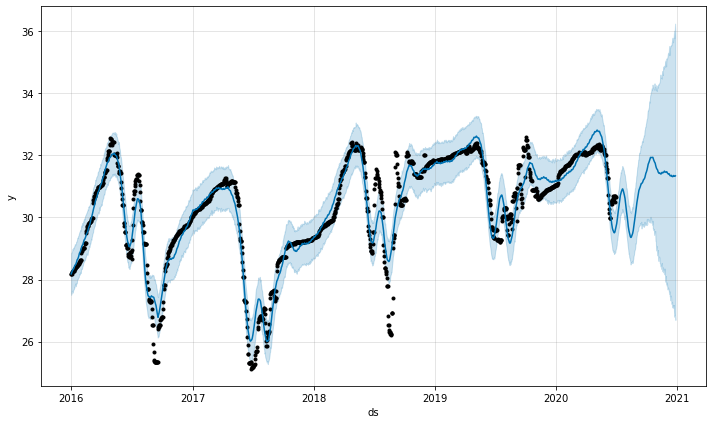

In [11]:
future = m.make_future_dataframe(periods=180)
forecast = m.predict(future)
fig1 = m.plot(forecast)

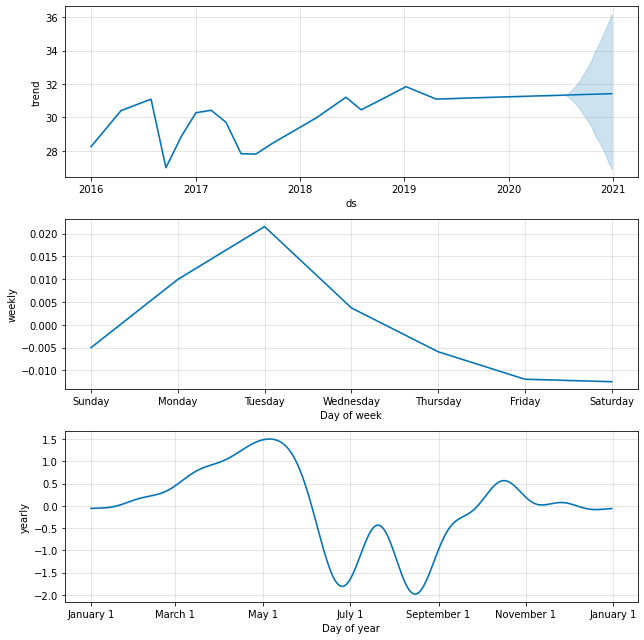

In [12]:
fig2 = m.plot_components(forecast)

In [ ]:
df = pd.DataFrame(result)
real = df[-180:].WATER_LEVEL
real

3472    124.63
3473    124.85
3474    124.91
3475    124.80
3476    124.77
         ...  
3647    129.81
3648    129.87
3649    129.89
3650    129.92
3651    129.94
Name: WATER_LEVEL, Length: 180, dtype: float64

In [ ]:
pred = forecast[-180:]
pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1642,2020-07-01,126.317415,122.767080,124.717110,126.317415,126.317415,-2.554005,-2.554005,-2.554005,-0.012346,-0.012346,-0.012346,-2.541659,-2.541659,-2.541659,0.0,0.0,0.0,123.763410
1643,2020-07-02,126.299397,122.961551,124.889887,126.299397,126.299397,-2.387939,-2.387939,-2.387939,-0.005640,-0.005640,-0.005640,-2.382299,-2.382299,-2.382299,0.0,0.0,0.0,123.911459
1644,2020-07-03,126.281380,123.058807,125.032289,126.281380,126.281380,-2.241436,-2.241436,-2.241436,-0.024056,-0.024056,-0.024056,-2.217380,-2.217380,-2.217380,0.0,0.0,0.0,124.039944
1645,2020-07-04,126.263362,123.251571,125.206694,126.263362,126.263362,-2.045165,-2.045165,-2.045165,0.004377,0.004377,0.004377,-2.049541,-2.049541,-2.049541,0.0,0.0,0.0,124.218197
1646,2020-07-05,126.245344,123.481042,125.380289,126.245344,126.245344,-1.873199,-1.873199,-1.873199,0.008295,0.008295,0.008295,-1.881494,-1.881494,-1.881494,0.0,0.0,0.0,124.372146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1817,2020-12-23,123.164313,116.175244,130.843300,115.442253,129.481723,1.171272,1.171272,1.171272,-0.012346,-0.012346,-0.012346,1.183618,1.183618,1.183618,0.0,0.0,0.0,124.335585
1818,2020-12-24,123.146295,116.410479,130.754630,115.368417,129.473430,1.194075,1.194075,1.194075,-0.005640,-0.005640,-0.005640,1.199716,1.199716,1.199716,0.0,0.0,0.0,124.340370
1819,2020-12-25,123.128277,116.138772,130.779654,115.294582,129.464024,1.193215,1.193215,1.193215,-0.024056,-0.024056,-0.024056,1.217271,1.217271,1.217271,0.0,0.0,0.0,124.321493
1820,2020-12-26,123.110260,116.234977,130.926425,115.220746,129.454618,1.240646,1.240646,1.240646,0.004377,0.004377,0.004377,1.236269,1.236269,1.236269,0.0,0.0,0.0,124.350905


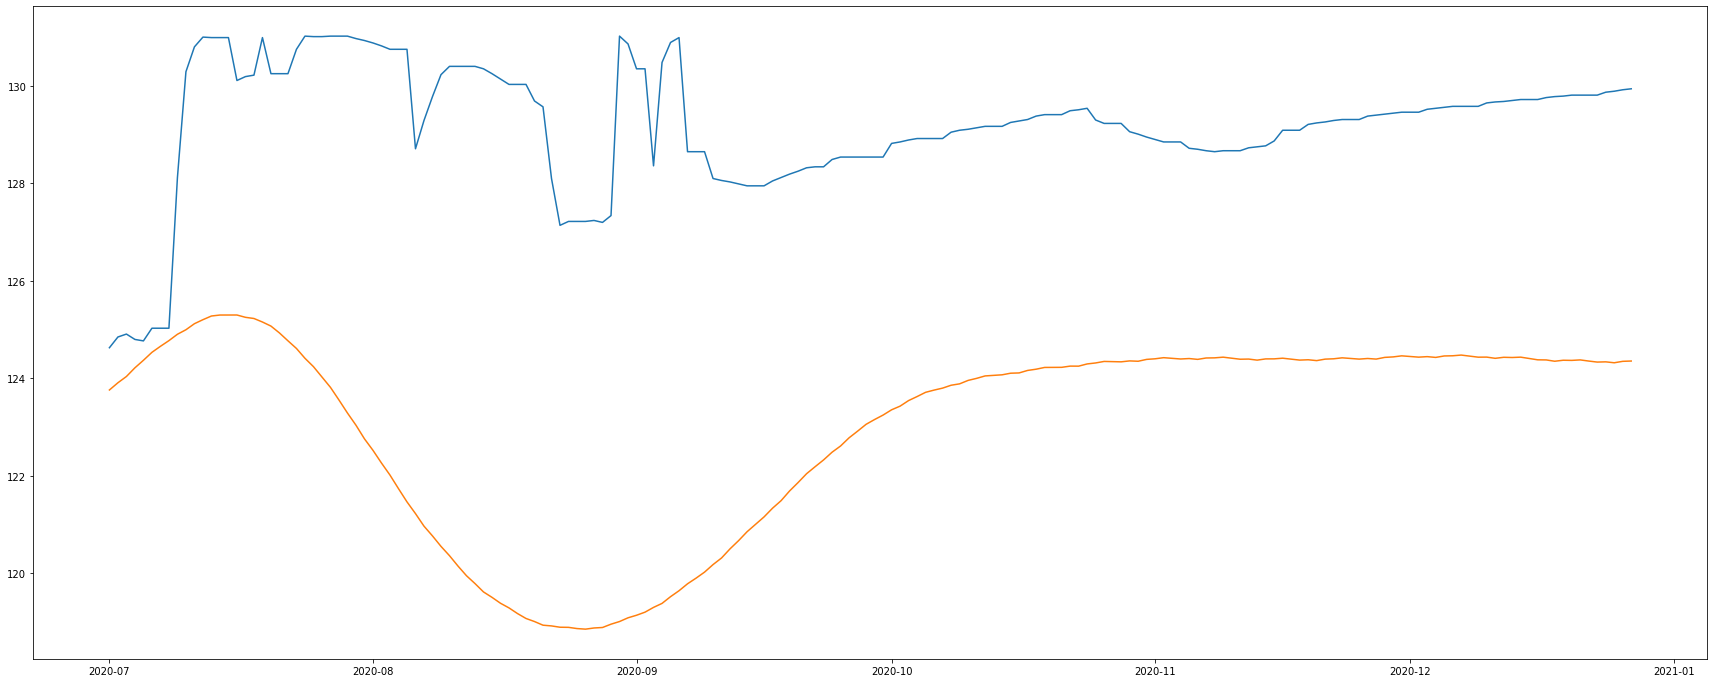

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,12))
num = [i for i in range(1,181)]
plt.plot(pred['ds'],real,pred['ds'],pred['yhat'])


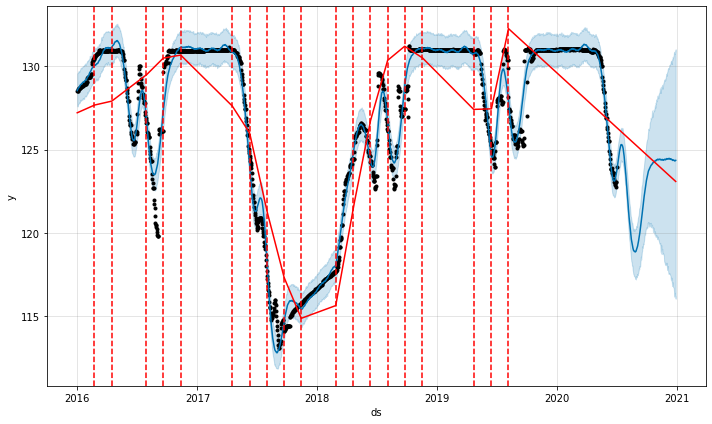

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

TypeError: ignored

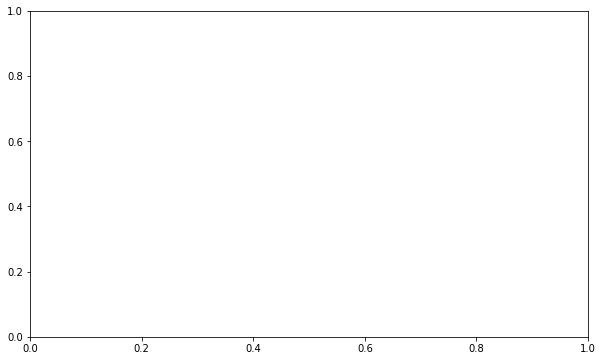

In [ ]:
m = Prophet(changepoint_prior_scale=0.3)

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
m = Prophet(
    # trend
    changepoint_prior_scale=0.3,
    # seasonality
    weekly_seasonality=10,
    yearly_seasonality=20,
    daily_seasonality=False
)

m.fit(df)
fig = m.plot_components(forecast)

ValueError: ignored

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,127.213776,127.690983,129.488461,127.213776,127.213776,1.331231,1.331231,1.331231,-0.024056,-0.024056,-0.024056,1.355287,1.355287,1.355287,0.0,0.0,0.0,128.545006
1,2016-01-02,127.222610,127.665557,129.586261,127.222610,127.222610,1.384567,1.384567,1.384567,0.004377,0.004377,0.004377,1.380191,1.380191,1.380191,0.0,0.0,0.0,128.607178
2,2016-01-03,127.231445,127.707233,129.635536,127.231445,127.231445,1.413503,1.413503,1.413503,0.008295,0.008295,0.008295,1.405208,1.405208,1.405208,0.0,0.0,0.0,128.644948
3,2016-01-04,127.240280,127.729592,129.675300,127.240280,127.240280,1.454146,1.454146,1.454146,0.024085,0.024085,0.024085,1.430061,1.430061,1.430061,0.0,0.0,0.0,128.694426
4,2016-01-05,127.249115,127.733429,129.623894,127.249115,127.249115,1.459757,1.459757,1.459757,0.005285,0.005285,0.005285,1.454472,1.454472,1.454472,0.0,0.0,0.0,128.708872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1817,2020-12-23,123.164313,117.074601,131.442239,115.911528,130.290357,1.171272,1.171272,1.171272,-0.012346,-0.012346,-0.012346,1.183618,1.183618,1.183618,0.0,0.0,0.0,124.335585
1818,2020-12-24,123.146295,116.895149,131.526851,115.773675,130.349907,1.194075,1.194075,1.194075,-0.005640,-0.005640,-0.005640,1.199716,1.199716,1.199716,0.0,0.0,0.0,124.340370
1819,2020-12-25,123.128277,116.932423,131.680754,115.635822,130.381071,1.193215,1.193215,1.193215,-0.024056,-0.024056,-0.024056,1.217271,1.217271,1.217271,0.0,0.0,0.0,124.321493
1820,2020-12-26,123.110260,116.936568,131.767464,115.516612,130.477938,1.240646,1.240646,1.240646,0.004377,0.004377,0.004377,1.236269,1.236269,1.236269,0.0,0.0,0.0,124.350905


             ds     trend  ...  additive_terms_upper       yhat
0    2011-01-01  6.287215  ...                   0.0  18.343123
1    2011-01-02  6.285925  ...                   0.0  18.334508
2    2011-01-03  6.284636  ...                   0.0  18.342566
3    2011-01-04  6.283347  ...                   0.0  18.330594
4    2011-01-05  6.282058  ...                   0.0  18.326635
...         ...       ...  ...                   ...        ...
3281 2019-12-26  6.392252  ...                   0.0  18.643897
3282 2019-12-27  6.392235  ...                   0.0  18.626597
3283 2019-12-28  6.392218  ...                   0.0  18.620362
3284 2019-12-29  6.392202  ...                   0.0  18.618981
3285 2019-12-30  6.392185  ...                   0.0  18.635026

[3286 rows x 22 columns]


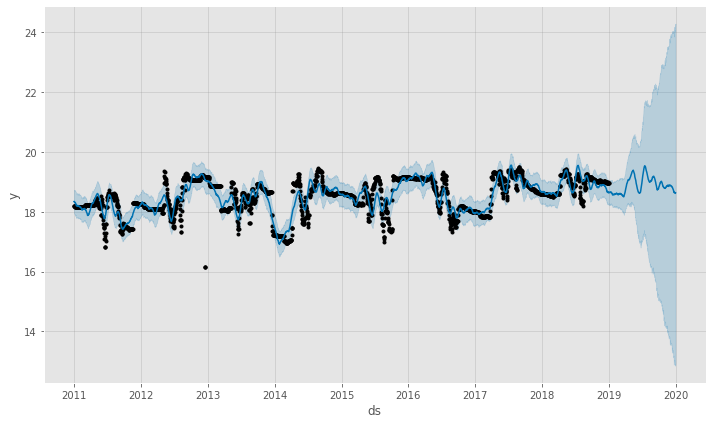

In [ ]:
 m = Prophet(
    # trend
    changepoint_prior_scale=0.3,
    # seasonality
    weekly_seasonality=10,
    yearly_seasonality=10,
    daily_seasonality=False,
    seasonality_mode='multiplicative'
)

# Specifying Custom Seasonalities
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

m.fit(m_df)
forecast = m.predict(future)
fig1 = m.plot(forecast)
print(forecast)

In [ ]:
future

,ds
0,2011-01-01
1,2011-01-02
2,2011-01-03
3,2011-01-04
4,2011-01-05
...,...
3281,2019-12-26
3282,2019-12-27
3283,2019-12-28
3284,2019-12-29


In [ ]:
m_df

,lev
day,
2011-01-01,72.0
2011-01-02,72.0
2011-01-03,71.8
2011-01-04,71.8
2011-01-05,71.8
...,...
2020-12-27,66.6
2020-12-28,66.6
2020-12-29,66.6


In [ ]:
m_df = df
m_df.columns=['day','lev']
m_df.index = m_df['day']
m_df.set_index('day',inplace=True)

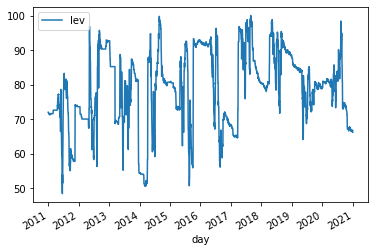

In [ ]:
import matplotlib.pyplot as plt

m_df.plot()
plt.show()

<Figure size 432x288 with 0 Axes>

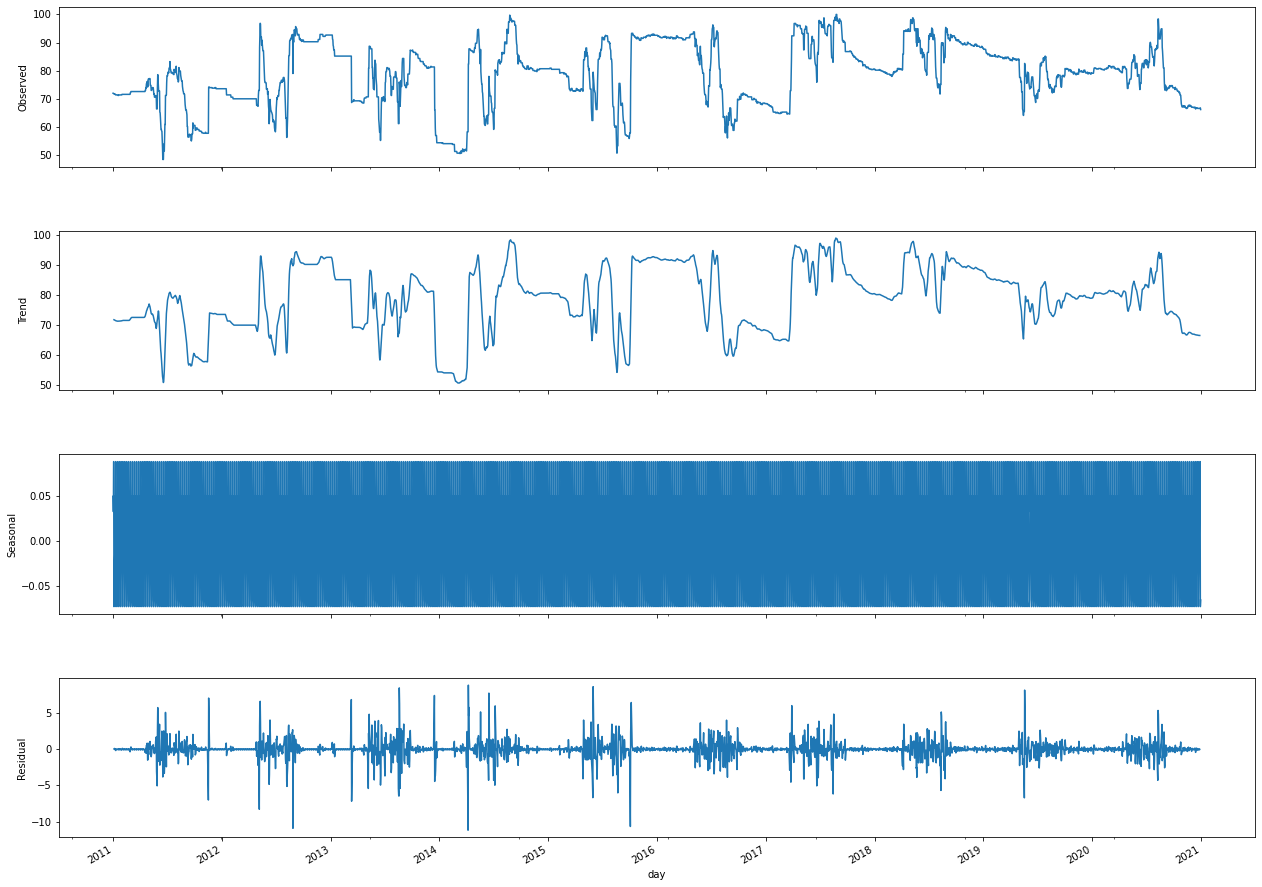

In [ ]:
ts = m_df
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts['lev'],model='additive',freq=7)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,15)

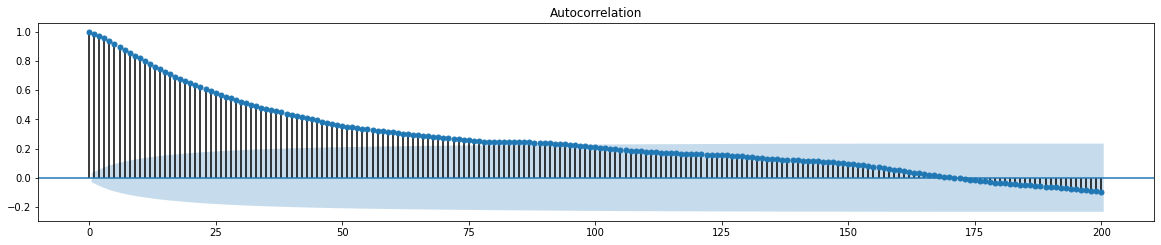

In [ ]:
import statsmodels.api as sm
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags=200, ax=ax1)

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts['lev'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.345901
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [ ]:
model = ARIMA(ts,order=(5,0,1))
model_fit=model.fit(disp=0)

start_index = datetime(2020,1,1)
end_index = datetime(2020,12,1)
forecast = model_fit.predict(start=start_index, end=end_index)

plt.figure(figsize=(22,8))
plt.plot(m_df.index, m_df.lev, label = 'original')
plt.plot(forecast, label='predicted')
plt.legend()
plt.show()

NameError: ignored

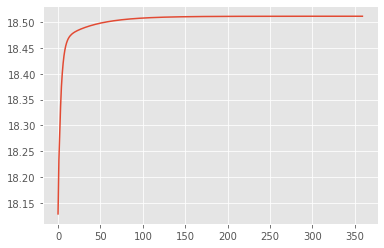

In [ ]:
fore = model_fit.forecast(steps=360)
plt.plot(fore[0])

In [ ]:
m_df

,lev
day,
2011-01-01,116.51
2011-01-02,116.51
2011-01-03,116.40
2011-01-04,116.39
2011-01-05,116.37
...,...
2020-12-27,114.15
2020-12-28,113.91
2020-12-29,113.86


In [ ]:
from pmdarima.arima import ADFTest
a_df = m_df[2557:]
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(a_df)

(0.011538858739336924, False)

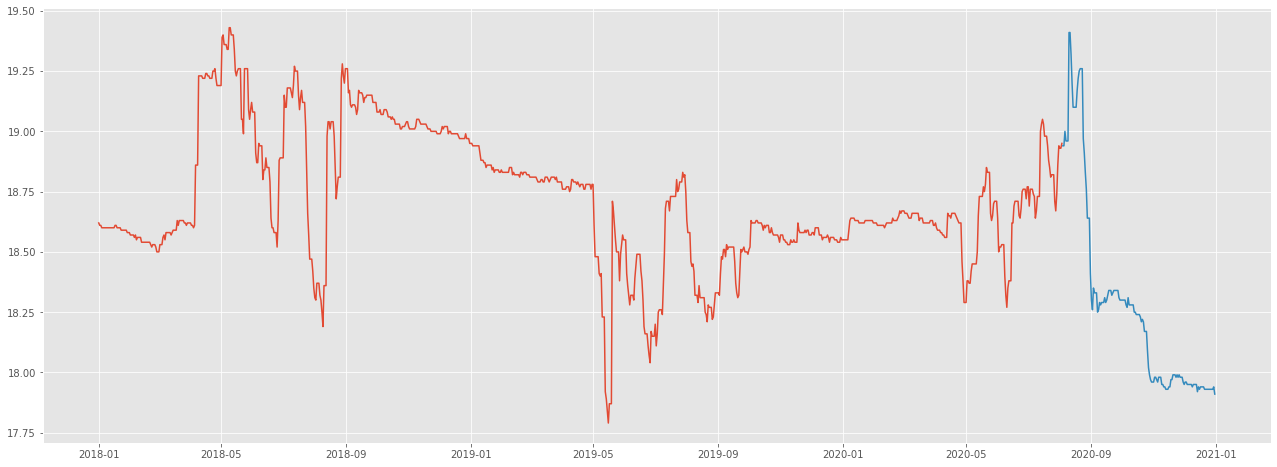

In [ ]:
train = a_df[:-150]
test = a_df[-150:]
plt.figure(figsize=(22,8))
plt.plot(train)
plt.plot(test)

In [ ]:
from pmdarima.arima import auto_arima
arima_model = auto_arima(train, start_p=0,d=1, start_q=0,
                         max_p=5, max_d=5, max_q=5,
                         start_P=0, D=1,start_Q=0,max_P=5,max_D=5,max_Q=5,
                         m=12, seasonal=True,
                         trace=True,
                         error_action='warn',
                         suppress_warnings=True,
                         stepwise=True,
                         random_state=20,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-1965.502, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-2250.835, Time=0.84 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=7.13 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-1975.950, Time=0.09 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-2368.479, Time=2.24 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=-2431.915, Time=5.20 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=-2465.218, Time=20.08 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=-2483.270, Time=11.26 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=60.58 sec


KeyboardInterrupt: ignored